## Bike Sharing Assignment

Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. 

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demand

In [582]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

##  1. Reading and Understanding the Data

In [583]:
bikes = pd.read_csv("day.csv")

In [584]:
bikes.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [585]:
bikes.shape

(730, 16)

The dataset has 730 rows and 16 columns

In [586]:
bikes.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [587]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no null/missing values in the dataset

##  2. Data Visualization

### Visualizing Numberical Variables

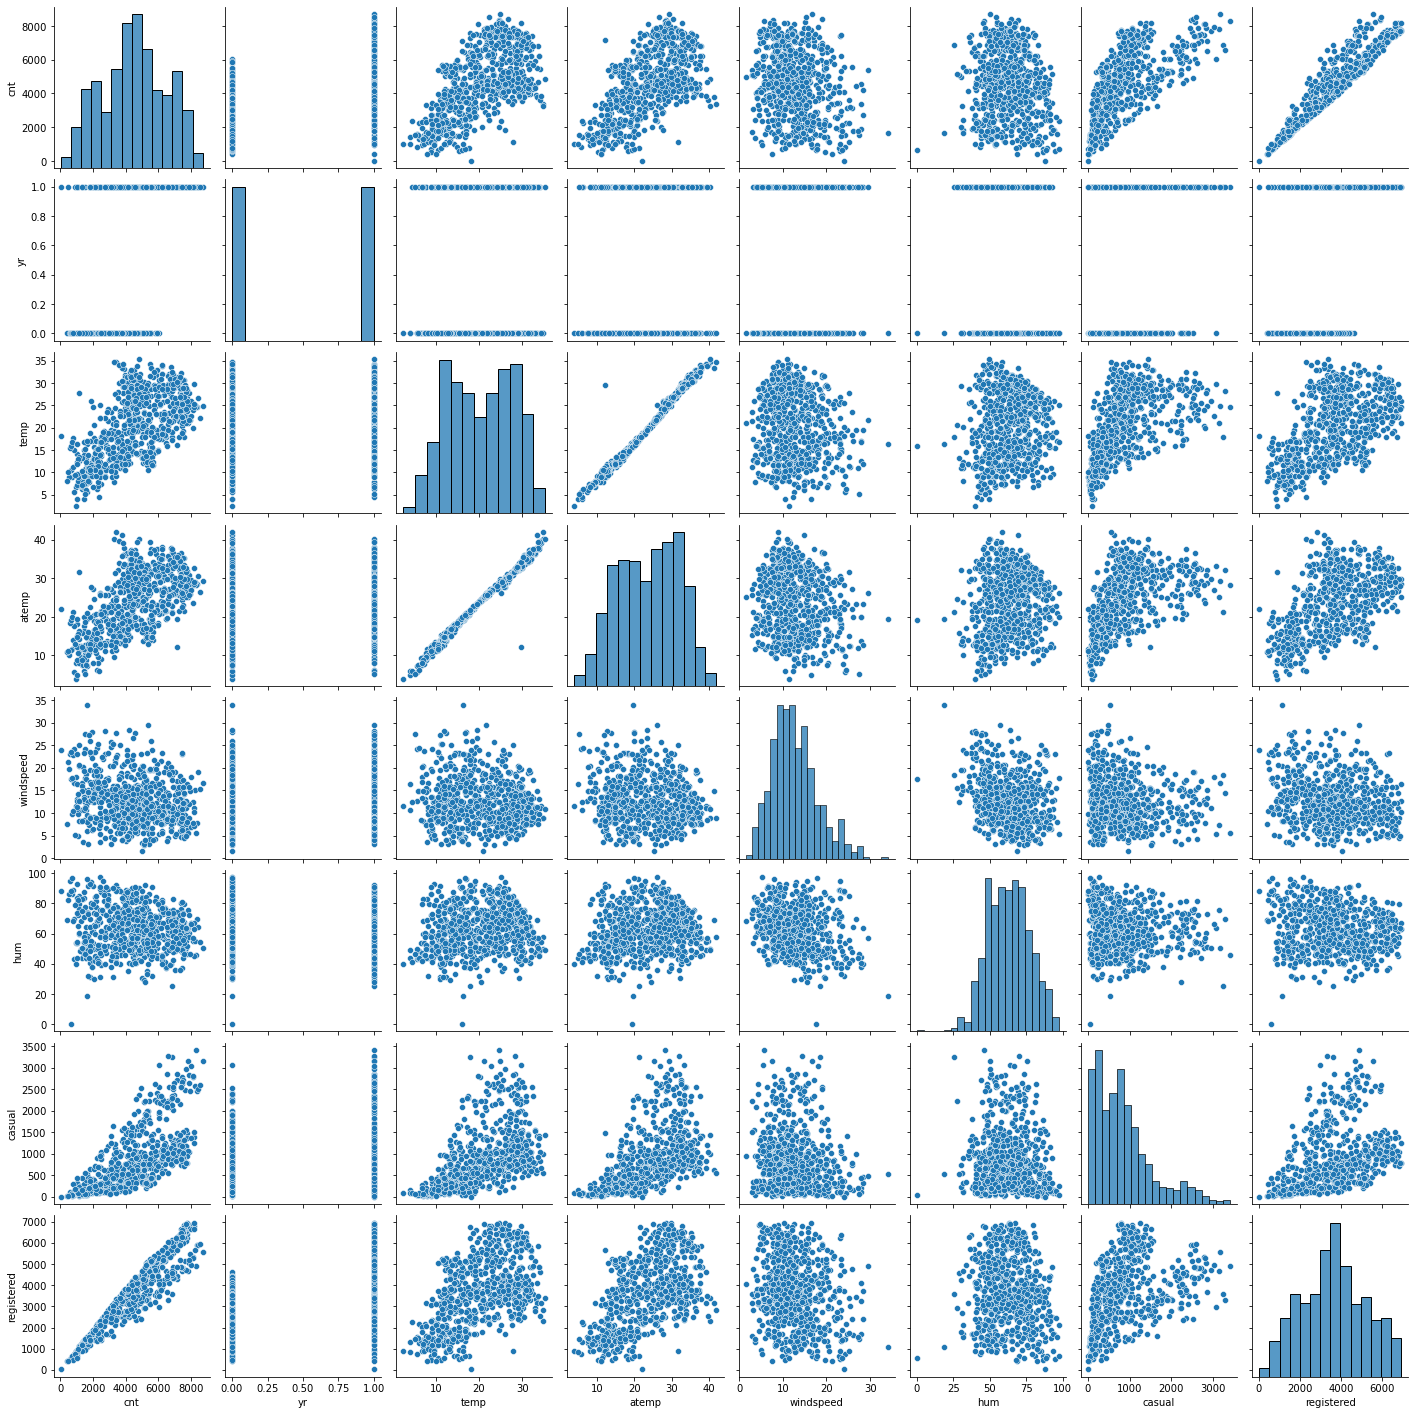

In [588]:
numVars = ['cnt','yr','temp','atemp','windspeed','hum','casual','registered']
sns.pairplot(bikes[numVars])

We can see most of the variable are correlated to the cnt(count) and also with some other independent variables.
We will be assessing the correlation of the variables within them.





### Visualizing Categorical Variables


The categorical variables season, weathersit have numerical values which are labels for the actual values present in data dictionary. Converting these labels to corresponding values for better analysing their impact on the number of bikes rented.
Also converting mnth and weekday data from numbers to corresponding values.

In [589]:
# intial values for the categorical variables
bikes[['season','mnth','weekday','weathersit']].head()

,season,mnth,weekday,weathersit
0,1,1,6,2
1,1,1,0,2
2,1,1,1,1
3,1,1,2,1
4,1,1,3,1


In [590]:
# Replacing season values to Spring, Summer, Fall and Winter based on the labels.
bikes.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# Replacing values for weathersit as follows:
# 1-Clear 
# 2- Cloudy/Mist
# 3-Light Rain/Snow
# 4-Heavy Rain/Snow
bikes.weathersit.replace((1,2,3,4),('Clear','Cloudy/Mist', 'Light Rain/Snow', 'Heavy Rain/Snow'), inplace=True)


# Converting mnth to Jan-Dec for values 1-12
bikes.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Converting weekday to Sunday-Saturday for values 0-6
bikes.weekday.replace((0,1,2,3,4,5,6),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'),inplace=True  )


# Corresonding string values for the categorical variable
bikes[['season','mnth','weekday','weathersit']].head()

,season,mnth,weekday,weathersit
0,Spring,Jan,Saturday,Cloudy/Mist
1,Spring,Jan,Sunday,Cloudy/Mist
2,Spring,Jan,Monday,Clear
3,Spring,Jan,Tuesday,Clear
4,Spring,Jan,Wednesday,Clear


Visaulaizing the categorical variables against the number of bikes rented.

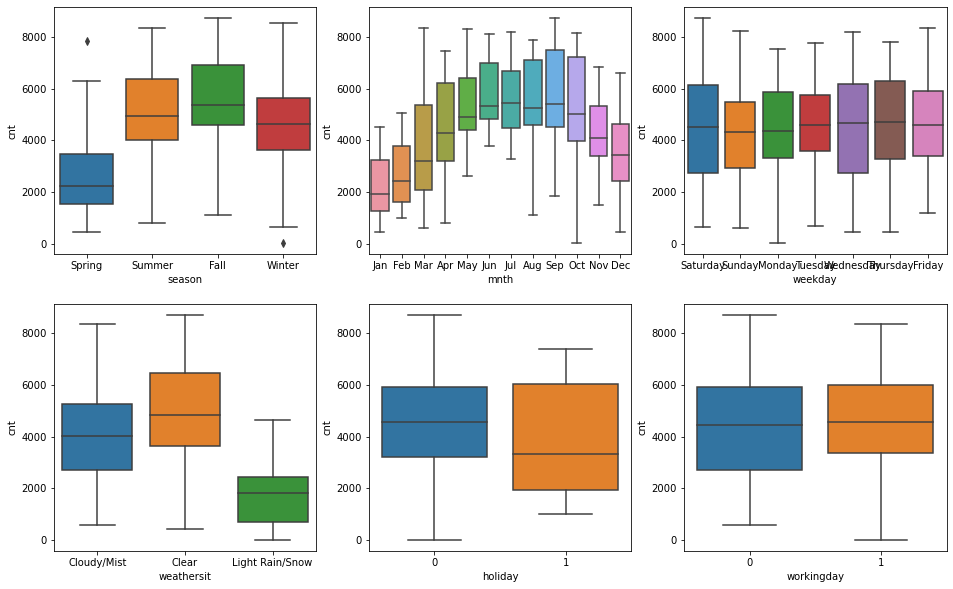

In [591]:
plt.figure(figsize=(16, 10))

catVars= ['season', 'mnth','weekday','weathersit','holiday','workingday']

for i in range(1,7):
    plt.subplot(2,3,i)
    sns.boxplot(x=catVars[i-1], y='cnt', data=bikes)

Most of the categorical variables seem to have some effect on the number of bikes rented.
There are more bikes rented when the weather is clear as opposed to Light rain or snow.Fall and Summer season have the most number of bikes rented.

## 3. Data Preperation

1. Checking for duplicates
2. Defining Dummy variables for correspoinding categorical variables
3. Removing Irrelevant columns
4. Checking for Missing values
 

#### 1.Checking for duplicates 

In [592]:
# checking the length of unique bike instants
len(bikes.instant.unique())


730

There are no duplicates present in the dataset as the number of unique records is equal to the total records present.

#### 2. Defining Dummy variables for the required categorical variables

In [593]:
# Some variables like weathersit, season, month etc. have data in the form of strings.
# Defining dummy variables for such columns 
bikes.season.unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [594]:
season= pd.get_dummies(bikes['season'], drop_first =True )
weekday= pd.get_dummies(bikes['weekday'], drop_first =True )
weathersit= pd.get_dummies(bikes['weathersit'], drop_first =True )
mnth= pd.get_dummies(bikes['mnth'], drop_first =True )

season.head()


,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Concatinating the original bikes dataset with the dummy variables dataframes created in the previous step.

In [595]:
bikes_dummy = pd.concat([bikes,season,weekday,weathersit,mnth], axis=1)
bikes_dummy.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'Spring', 'Summer', 'Winter', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Cloudy/Mist',
       'Light Rain/Snow', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

#### 3. Removing Irrelevant columns

1. instant - Unique identifier for each record.Not needed for model building.
2. weekday, weathersit, season, mnth -  Columns with string values. Replaced with corresponding dummy variables.
3. dteday - Sufficient info already present in weekday and month columns.
4. casual, registered - Category of customers that rent the bike. Not needed for analysis.

In [596]:

# dropping irrelevant columns.
bikes_dummy.drop(['instant','weekday','weathersit','season','mnth','dteday', 'casual','registered'], axis=1, inplace=True)


#### 4. Checking for missing values

In [597]:
bikes_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   Spring           730 non-null    uint8  
 9   Summer           730 non-null    uint8  
 10  Winter           730 non-null    uint8  
 11  Monday           730 non-null    uint8  
 12  Saturday         730 non-null    uint8  
 13  Sunday           730 non-null    uint8  
 14  Thursday         730 non-null    uint8  
 15  Tuesday          730 non-null    uint8  
 16  Wednesday        730 non-null    uint8  
 17  Cloudy/Mist     

The dataset has no missing/null values

## 4. Splitting the dataset into Train Test sets

In [598]:
# 70% of data is for model training and 30% for testing and validation.
bikes_train , bikes_test = train_test_split( bikes_dummy, train_size=0.7, random_state= 101)

In [599]:
# Train Dataset
bikes_train.shape

(510, 30)

In [600]:
# Test Dataset
bikes_test.shape

(220, 30)

In [601]:
bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
117,0,0,1,25.317500,28.94645,70.0833,21.500836,4058,0,1,...,0,0,0,0,0,0,0,0,0,0
712,1,0,1,11.548347,14.70960,64.2917,8.792343,5611,0,0,...,1,0,0,0,0,0,0,0,0,0
60,0,0,1,13.735000,16.00355,44.9583,20.624811,2134,1,0,...,0,0,0,0,0,1,0,0,0,0
72,0,0,1,13.333897,16.60000,49.6957,9.174042,2046,1,0,...,0,0,0,0,0,1,0,0,0,0
124,0,0,1,18.825847,22.09585,44.4167,19.791264,4433,0,1,...,0,0,0,0,0,0,1,0,0,0


## 5. Rescaling the variables

In [602]:
# Values for variables like temp, hum, cnt, windspeed and atemp have higher values. rescaling these values between 0 and 1.

scaler = MinMaxScaler()

scaleVars = ['temp','atemp','hum','windspeed','cnt']

bikes_train[scaleVars] = scaler.fit_transform(bikes_train[scaleVars])



In [603]:
#Dataset after rescaling
bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
117,0,0,1,0.695756,0.656133,0.655484,0.615407,0.472987,0,1,...,0,0,0,0,0,0,0,0,0,0
712,1,0,1,0.277292,0.282377,0.581470,0.224374,0.654987,0,0,...,1,0,0,0,0,0,0,0,0,0
60,0,0,1,0.343747,0.316347,0.334397,0.588452,0.247510,1,0,...,0,0,0,0,0,1,0,0,0,0
72,0,0,1,0.331557,0.332005,0.394939,0.236118,0.237197,1,0,...,0,0,0,0,0,1,0,0,0,0
124,0,0,1,0.498465,0.476286,0.327476,0.562804,0.516934,0,1,...,0,0,0,0,0,0,1,0,0,0


#### Correlation Heatmap of the scaled variable

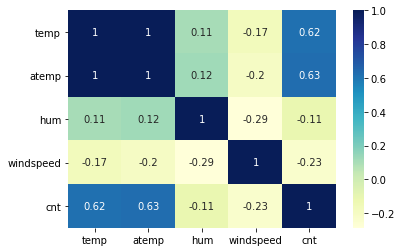

In [604]:
sns.heatmap(bikes_train[scaleVars].corr(),annot = True, cmap="YlGnBu")
plt.show()

Here the temp and atemp variables have a correlation of 1. We will remove one of them in the following steps

### 6. Building a Linear Model

There are around 30 features in our dataset. Performing RFE to get the top 15 features

In [605]:
#rfe imports

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [606]:
# splitting into X and Y set for the model.
y_train = bikes_train.pop('cnt')
X_train = bikes_train


In [607]:
# Running RFE
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm ,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [608]:
# List of Features selected by RFE
rfeCols = bikes_train.columns[rfe.support_]
rfeCols

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Saturday', 'Sunday', 'Cloudy/Mist', 'Light Rain/Snow', 'Dec',
       'Jul', 'Nov'],
      dtype='object')

In [609]:
# List of Features removed by RFE
rfeRemovedCols = bikes_train.columns[~rfe.support_]
rfeRemovedCols

Index(['temp', 'Summer', 'Monday', 'Thursday', 'Tuesday', 'Wednesday', 'Aug',
       'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Oct', 'Sep'],
      dtype='object')

In [610]:
# Checking which parameters have been accepted.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 6),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 9),
 ('Winter', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 15),
 ('Tuesday', False, 10),
 ('Wednesday', False, 13),
 ('Cloudy/Mist', True, 1),
 ('Light Rain/Snow', True, 1),
 ('Aug', False, 11),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 7),
 ('May', False, 5),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', False, 4)]

### Building model using statsmodel, for the detailed statistics

Now we will proceed with **manual feature** selection by building the model using **statsmodel**.

In [611]:
import statsmodels.api as sm

In [612]:
# Dataset with the RFE selected columns
X_train_rfe = X_train[rfeCols]

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train, X_train_rfe).fit()

# Checking the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     174.1
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          7.06e-181
Time:                        21:50:23   Log-Likelihood:                 486.02
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     495   BIC:                            -878.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2596      0.026      9.994      0.000       0.209       0.311
yr                  0.2369      0.009     27.558      0.000       0.220       0.254
holiday            -0.0123      0.022     -0.568      0.570      -0.055       0.030
workingday          0.0981      0.010     10.184      0.000       0.079       0.117
atemp               0.4775      0.036     13.154      0.000       0.406       0.549
hum                -0.1400      0.035     -4.056      0.000      -0.208      -0.072
windspeed          -0.1767      0.029     -6.106      0.000      -0.234      -0.120
Spring             -0.1296      0.016     -8.070      0.000      -0.161      -0.098
Winter              0.0809      0.015      5.501      0.000       0.052       0.110
Saturday            0.1113      0.012      9.252      0.000       0.088       0.135
Sunday              0.0625      0.012      5.096      0.000       0.038       0.087
Cloudy/Mist        -0.0561      0.012     -4.814      0.000      -0.079      -0.033
Light Rain/Snow    -0.2361      0.030     -7.908      0.000      -0.295      -0.177
Dec                -0.0630      0.018     -3.580      0.000      -0.098      -0.028
Jul                -0.0792      0.017     -4.604      0.000      -0.113      -0.045
Nov                -0.0780      0.020     -3.869      0.000      -0.118      -0.038
==============================================================================
Omnibus:                       83.996   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.873
Skew:                          -0.820   Prob(JB):                     1.80e-48
Kurtosis:                       5.767   Cond. No.                     1.90e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.96e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We have achieved an R sqaured of 83.1% and adjusted R squared of 82.6%.
Checking the VIF in the next step to remove hihgly correlated features.

### Checking VIF

In [613]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [614]:
# Calcualting the VIFs for the model features
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns

vif['VIF'] = [round(variance_inflation_factor(X.values , i),2) for i in range(X.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif
    

,Features,VIF
2,holiday,inf
3,workingday,inf
9,Saturday,inf
10,Sunday,inf
4,atemp,3.43
7,Spring,2.77
8,Winter,2.25
5,hum,2.19
11,Cloudy/Mist,1.70
15,Nov,1.59


There are variables with very high VIF, removing these and rebuilding the model.

#### Dropping the variable and rebuilding the model

In [615]:
# function to drop the mentioned feature variable, build the model and print the summary and VIF
def dropAndReBuild(feature):
    # update variable from global scope
    global X_train_rfe, y_train, lm
    
    # dropping variable with very high VIF
    X_train_rfe.drop(feature, axis=1, inplace=True)

    # Adding a constant variable 
    X_train_rfe = sm.add_constant(X_train_rfe)

    # Running the linear model
    lm = sm.OLS(y_train,X_train_rfe).fit()

    # check the summary of our linear model
    print(lm.summary())
    
    # Calculate the VIFs for the new model after removing constant
    X_train_rfe = X_train_rfe.drop(['const'], axis=1)
    vif = pd.DataFrame()
    X = X_train_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [round(variance_inflation_factor(X.values, i), 2) for i in range(X.shape[1])]
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

Removing 'holiday' as it had a very high VIF

In [616]:
dropAndReBuild('holiday')
# Summary after dropping holiday

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     174.1
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          7.06e-181
Time:                        21:50:23   Log-Likelihood:                 486.02
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     495   BIC:                            -878.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2473      0.041     

Dropping hum as it has a VIF of 19.75

In [617]:


dropAndReBuild('hum')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     180.6
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          1.62e-178
Time:                        21:50:23   Log-Likelihood:                 477.68
No. Observations:                 510   AIC:                            -927.4
Df Residuals:                     496   BIC:                            -868.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1815      0.038     

Here workingday has a high VIF which above the acceptable range.

In [618]:
# dropping working day and rebuilding the model
dropAndReBuild('workingday')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     187.4
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          1.11e-175
Time:                        21:50:24   Log-Likelihood:                 468.20
No. Observations:                 510   AIC:                            -910.4
Df Residuals:                     497   BIC:                            -855.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2897      0.029     

In [619]:
# The VIF for the features is within the acceptable threshold.
# Dropping Saturday as it has high p value
dropAndReBuild('Saturday')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     203.8
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          2.02e-176
Time:                        21:50:24   Log-Likelihood:                 467.20
No. Observations:                 510   AIC:                            -910.4
Df Residuals:                     498   BIC:                            -859.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2931      0.029     

Dropping Sunday has a high p value.

In [620]:
# Dropping Sunday and rebuilding the model

dropAndReBuild('Sunday')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     219.8
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          1.10e-175
Time:                        21:50:24   Log-Likelihood:                 462.65
No. Observations:                 510   AIC:                            -903.3
Df Residuals:                     499   BIC:                            -856.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2831      0.029     

In [621]:
lm.params

const              0.283134
yr                 0.243069
atemp              0.449196
windspeed         -0.137140
Spring            -0.133987
Winter             0.074683
Cloudy/Mist       -0.080227
Light Rain/Snow   -0.289223
Dec               -0.066443
Jul               -0.066651
Nov               -0.084454
dtype: float64

Checking correlation among the accepted features.

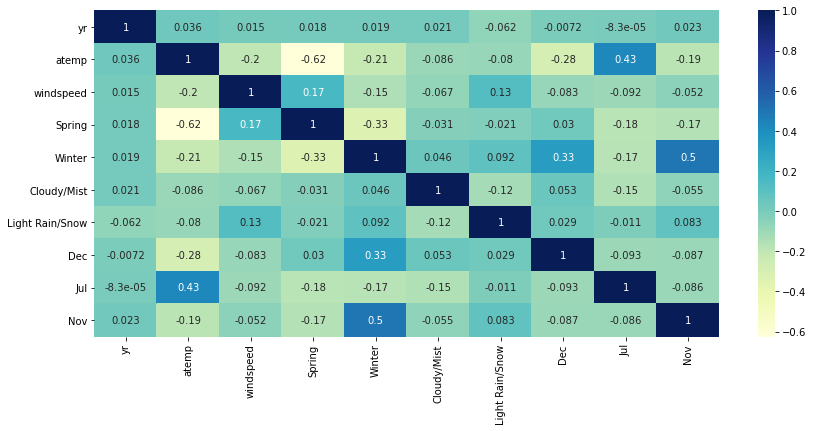

In [622]:
# plot correlation among final accepted featuers
plt.figure(figsize = (14, 6))
sns.heatmap(X_train_rfe.corr(), annot = True, cmap="YlGnBu")
plt.show()

The R squared value is 81.5% . 
Now as you can see, the VIFs and p-values both are within an acceptable range and all the accepted features have minimal correlation among them. 

Performing residual analysis for this final model.

##  7. Residual Analysis of the train data

Look out the final summary of the model.

In [623]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     219.8
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          1.10e-175
Time:                        21:50:24   Log-Likelihood:                 462.65
No. Observations:                 510   AIC:                            -903.3
Df Residuals:                     499   BIC:                            -856.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2831      0.029      9.760      0.000       0.226       0.340
yr                  0.2431      0.009     27.548      0.000       0.226       0.260
atemp               0.4492      0.037     12.232      0.000       0.377       0.521
windspeed          -0.1371      0.029     -4.795      0.000      -0.193      -0.081
Spring             -0.1340      0.017     -8.019      0.000      -0.167      -0.101
Winter              0.0747      0.015      4.928      0.000       0.045       0.104
Cloudy/Mist        -0.0802      0.010     -8.303      0.000      -0.099      -0.061
Light Rain/Snow    -0.2892      0.027    -10.879      0.000      -0.341      -0.237
Dec                -0.0664      0.018     -3.632      0.000      -0.102      -0.031
Jul                -0.0667      0.018     -3.757      0.000      -0.102      -0.032
Nov                -0.0845      0.021     -4.023      0.000      -0.126      -0.043
==============================================================================
Omnibus:                       83.934   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.189
Skew:                          -0.831   Prob(JB):                     8.39e-47
Kurtosis:                       5.687   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [624]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

#Prediction on the training values
y_train_pred = lm.predict(X_train_rfe)

Checking error term variance and distribution.

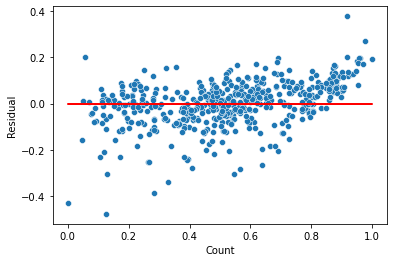

In [625]:
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

There are no patterns found in the residual values.
Also they mostly have a constant variance. 

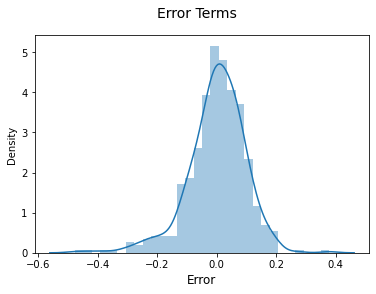

In [626]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((residual), bins = 30)
fig.suptitle('Error Terms', fontsize = 14)
plt.xlabel('Error', fontsize = 12)
plt.show()

The error terms show a normal distribution with mean around 0.

In [627]:
from sklearn.metrics import mean_squared_error, r2_score

In [628]:
# calculate RMSE for the model
print("RMSE:",np.sqrt(mean_squared_error(y_train_pred, y_train)))

RMSE: 0.09767555229569418


## 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to make predictions using the final model.

#### Applying the scaling on the bikes_test set

In [629]:
bikes_test[scaleVars] = scaler.transform(bikes_test[scaleVars])
bikes_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
299,0,0,1,0.511964,0.496145,0.798722,0.361537,0.309036,0,0,...,0,0,0,0,0,0,0,0,1,0
723,1,1,0,0.289300,0.282736,0.698870,0.301676,0.116137,1,0,...,1,0,0,0,0,0,0,0,0,0
647,1,0,1,0.566998,0.556652,0.566027,0.341041,0.898746,0,0,...,0,0,0,0,0,0,0,0,1,0
520,1,0,1,0.600225,0.586515,0.543663,0.385888,0.817884,0,1,...,0,0,0,0,1,0,0,0,0,0
114,0,0,1,0.682257,0.650319,0.752396,0.335912,0.474745,0,1,...,0,0,0,0,0,0,0,0,0,0


#### Dividing into X_test and y_test

In [630]:

y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [631]:
# Accepted features as per the final model
X_train_rfe.columns

Index(['const', 'yr', 'atemp', 'windspeed', 'Spring', 'Winter', 'Cloudy/Mist',
       'Light Rain/Snow', 'Dec', 'Jul', 'Nov'],
      dtype='object')

In [632]:
# features for X_test
modelCols = list(X_train_rfe.columns)
modelCols.remove('const')

X_test =X_test[modelCols]
X_test.head()

,yr,atemp,windspeed,Spring,Winter,Cloudy/Mist,Light Rain/Snow,Dec,Jul,Nov
299,0,0.496145,0.361537,0,1,1,0,0,0,0
723,1,0.282736,0.301676,1,0,1,0,1,0,0
647,1,0.556652,0.341041,0,1,0,0,0,0,0
520,1,0.586515,0.385888,0,0,1,0,0,0,0
114,0,0.650319,0.335912,0,0,0,0,0,0,0


In [633]:
# Adding constant term
X_test = sm.add_constant(X_test)

#Making predictions using the final model on X_test

y_pred  = lm.predict(X_test)

## Step 8: Model Evaluation

Plotting predicted values against y_test values.

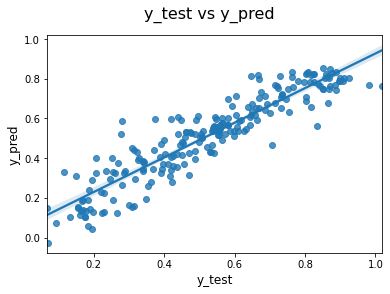

In [634]:
# Plotting y_test and y_pred to understand the spread
sns.regplot(y_test, y_pred)
plt.suptitle('y_test vs y_pred', fontsize = 16)
plt.xlabel('y_test', fontsize = 12)
plt.ylabel('y_pred', fontsize = 12)      
plt.show()

In [635]:
# calculate RMSE for the model
print("RMSE:",np.sqrt(mean_squared_error(y_pred, y_test)))

RMSE: 0.0889834291495374


In [636]:
# find r2 score for test
round(r2_score(y_test, y_pred),4)

0.8449

The **RMSE** value is 0.089 and the **R squared value** is **84.5%**  which is good and is close to the **81.5%** value that we got for the training set.

**The equation for the best fitted line is:**

$ cnt = 0.2831 +  0.4491  \times  atemp  +  0.2431  \times  yr  -  0.2892 \times Light Rain/Snow  -  0.1371 \times windspeed +  0.0747 \times Winter  -  0.0664 \times Dec  -  0.1339 \times Spring  -  0.0844 \times Nov  -  0.0665 \times Jul -  0.0802 \times Cloudy/Mist $

The best features that are significant in predicting the prices are : **atemp, yr, windspeed, Light Rain/Snow, Cloudy/Mist, Winter, Dec, Spring, Nov, Jul**